In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Entendimento do Negócio e contexto

Este projeto analisa os fatores que influenciam o custo do plano de saúde corporativo de uma empresa do setor alimentício com mais de 20 mil colaboradores no Brasil.

A pesquisa foi conduzida com 1.338 colaboradores selecionados aleatoriamente e contém informações sobre índice de massa corporal (IMC), hábito de fumar e quantidade de filhos.

A análise segue a metodologia CRISP-DM, aplicando técnicas de análise exploratória, associação e regressão linear para compreender quais fatores estão mais relacionados ao aumento do custo do plano e propor ações preventivas.


### Objetivo

Quais fatores estão mais relacionados com o custo do plano de saúde?

Que ações preventivas podem ser implementadas para reduzir esse custo?

## Entendimento dos dados

### Descrição dos dados

In [22]:
# importando dados do arquivo excel
df = pd.read_excel('../data/base_plano_de_saude.xlsx', sheet_name= 'base')

In [23]:
df

,Idade,Sexo,IMC,Qte_Filhos,Fumante,Região,Custo_Saude
0,19,Feminino,27.900,0,Sim,Centro,1688.492400
1,18,Masculino,33.770,1,Não,Sudeste,172.555230
2,28,Masculino,33.000,3,Não,Sudeste,444.946200
3,33,Masculino,22.705,0,Não,Norte,2198.447061
4,32,Masculino,28.880,0,Não,Norte,386.685520
...,...,...,...,...,...,...,...
1333,50,Masculino,30.970,3,Não,Norte,1060.054830
1334,18,Feminino,31.920,0,Não,Nordeste,220.598080
1335,18,Feminino,36.850,0,Não,Sudeste,162.983350
1336,21,Feminino,25.800,0,Não,Centro,200.794500


A base contém 1.338 registros e 7 colunas. Cada linha representa um colaborador. As variáveis apresentam tipos coerentes com o esperado (numéricos para IMC e custo, inteiros para filhos e categóricos para fumante). Não há colunas extras nem inconsistências de tipo.

In [24]:
df.head() # verificando as primeiras linhas do dataframe

,Idade,Sexo,IMC,Qte_Filhos,Fumante,Região,Custo_Saude
0,19,Feminino,27.900,0,Sim,Centro,1688.492400
1,18,Masculino,33.770,1,Não,Sudeste,172.555230
2,28,Masculino,33.000,3,Não,Sudeste,444.946200
3,33,Masculino,22.705,0,Não,Norte,2198.447061
4,32,Masculino,28.880,0,Não,Norte,386.685520


In [25]:
df.columns # verificando as colunas do dataframe

Index(['Idade', 'Sexo', 'IMC', 'Qte_Filhos', 'Fumante', 'Região',
       'Custo_Saude'],
      dtype='object')

In [26]:
df.info() # verificando informações do dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Idade        1338 non-null   int64  
 1   Sexo         1338 non-null   object 
 2   IMC          1338 non-null   float64
 3   Qte_Filhos   1338 non-null   int64  
 4   Fumante      1338 non-null   object 
 5   Região       1338 non-null   object 
 6   Custo_Saude  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
df.isna().sum() # verificando valores nulos no dataframe

Idade          0
Sexo           0
IMC            0
Qte_Filhos     0
Fumante        0
Região         0
Custo_Saude    0
dtype: int64

Não há nenhum valores ausentes

In [28]:
df.isnull().sum() # verificando valores nulos no dataframe

Idade          0
Sexo           0
IMC            0
Qte_Filhos     0
Fumante        0
Região         0
Custo_Saude    0
dtype: int64

In [29]:
df.duplicated().sum() # verificando valores duplicados no dataframe

1

In [30]:
df[df.duplicated(keep = False)]

,Idade,Sexo,IMC,Qte_Filhos,Fumante,Região,Custo_Saude
195,19,Masculino,30.59,0,Não,Norte,163.95631
581,19,Masculino,30.59,0,Não,Norte,163.95631


In [31]:
df.describe() # Verificando se há valores inconsistentes ou fora do esperado nas (variáveis quantitativas)

,Idade,IMC,Qte_Filhos,Custo_Saude
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,1327.042227
std,14.049960,6.098187,1.205493,1211.001124
min,18.000000,15.960000,0.000000,112.187390
25%,27.000000,26.296250,0.000000,474.028715
50%,39.000000,30.400000,1.000000,938.203300
75%,51.000000,34.693750,2.000000,1663.991252
max,64.000000,53.130000,5.000000,6377.042801


In [32]:
# Verificando se há valores inconsistentes ou fora do esperado nas (variáveis qualitativas)
df['Sexo'].value_counts(),df['Fumante'].value_counts(),df['Região'].value_counts()


(Sexo
 Masculino    676
 Feminino     662
 Name: count, dtype: int64,
 Fumante
 Não    1064
 Sim     274
 Name: count, dtype: int64,
 Região
 Sudeste     364
 Centro      325
 Norte       325
 Nordeste    324
 Name: count, dtype: int64)

Sanity check concluído. A base possui 1.338 registros e 7 colunas. Após a verificação de duplicidades, 1 registro duplicado apareceu, mas como não temos informação se realmente é um colaborador que possui as mesmas características, ou se foi uma mesma resposta pra colaborador.

Não possui também valores nulos ou ausentes.

Os tipos de dados estão coerentes com o esperado.

In [33]:
#Criando o dicionário de metadados

df_meta_dados = pd.DataFrame({
    'Variável': ['Idade', 'Sexo', 'IMC', 'Filhos', 'Fumante', 'Região', 'Custo'],
    'Descrição': [
        'Idade do colaborador em anos',
        'Sexo do colaborador (masculino ou feminino)',
        'Índice de Massa Corporal (IMC) do colaborador',
        'Número de filhos/dependentes do colaborador',
        'Indica se o colaborador é fumante (sim ou não)',
        'Região geográfica onde o colaborador reside',
        'Custo anual dos cuidados de saúde do colaborador em dólares'
    ],
    'Tipo de Dado': [
        'Inteiro',
        'Categórico',
        'Numérico (float)',
        'Inteiro',
        'Categórico',
        'Categórico',
        'Numérico (float)'
    ],
    'Tipo de Variável': [
        'Quantitativa Discreta',
        'Qualitativa Nominal',
        'Quantitativa Contínua',
        'Quantitativa Discreta',
        'Qualitativa Nominal',
        'Qualitativa Nominal',
        'Quantitativa Contínua'
    ]})

In [34]:
#Exibindo o dicionário de metadados
df_meta_dados

,Variável,Descrição,Tipo de Dado,Tipo de Variável
0,Idade,Idade do colaborador em anos,Inteiro,Quantitativa Discreta
1,Sexo,Sexo do colaborador (masculino ou feminino),Categórico,Qualitativa Nominal
2,IMC,Índice de Massa Corporal (IMC) do colaborador,Numérico (float),Quantitativa Contínua
3,Filhos,Número de filhos/dependentes do colaborador,Inteiro,Quantitativa Discreta
4,Fumante,Indica se o colaborador é fumante (sim ou não),Categórico,Qualitativa Nominal
5,Região,Região geográfica onde o colaborador reside,Categórico,Qualitativa Nominal
6,Custo,Custo anual dos cuidados de saúde do colaborad...,Numérico (float),Quantitativa Contínua


In [35]:
#Exportando o dicionário de metadados para um arquivo excel
df_meta_dados.to_excel('../data/dicionario_de_metadados.xlsx', index =False)

### Transformação dos dados

In [36]:
#Criando a variável de faixa de IMC
df['Faixa_IMC'] = pd.cut(df['IMC'],
                        bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')],
                        labels = [
                            'Abaixo do peso',
                            'Peso normal',
                            'Sobrepeso',
                            'Obesidade grau I',
                            'Obesidade grau II',
                            'Obesidade grau III',
                        ],
                        right = True,
)
df.head()

,Idade,Sexo,IMC,Qte_Filhos,Fumante,Região,Custo_Saude,Faixa_IMC
0,19,Feminino,27.900,0,Sim,Centro,1688.492400,Sobrepeso
1,18,Masculino,33.770,1,Não,Sudeste,172.555230,Obesidade grau I
2,28,Masculino,33.000,3,Não,Sudeste,444.946200,Obesidade grau I
3,33,Masculino,22.705,0,Não,Norte,2198.447061,Peso normal
4,32,Masculino,28.880,0,Não,Norte,386.685520,Sobrepeso


In [37]:
df.value_counts(['Faixa_IMC'])

Faixa_IMC         
Obesidade grau I      397
Sobrepeso             380
Obesidade grau II     226
Peso normal           221
Obesidade grau III     93
Abaixo do peso         21
Name: count, dtype: int64

# Análise Exploratória (EDA)

## Análise Univariada

### Variável - IMC

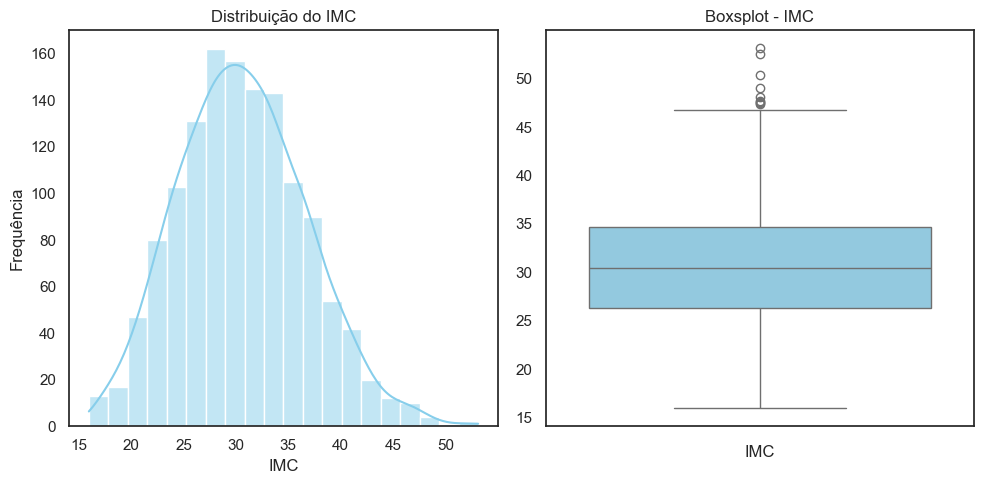

In [38]:
sns.set(style="white", palette="pastel")

# Criando a figura com o 1 linha e 2 colunas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histograma do IMC

sns.histplot(df['IMC'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribuição do IMC')
axes[0].set_xlabel('IMC')
axes[0].set_ylabel('Frequência')

# Boxsplot do IMC

sns.boxplot(y=df['IMC'], ax=axes[1], color='skyblue')
axes[1].set_title('Boxsplot - IMC')
axes[1].set_xlabel('IMC')
axes[1].set_ylabel('')


plt.tight_layout()
plt.show()


Para a variável IMC a distribuição dos valores da amostra se aproxima de uma distribuição normal

Outliers acima de 45 anos

### Variável - Idade

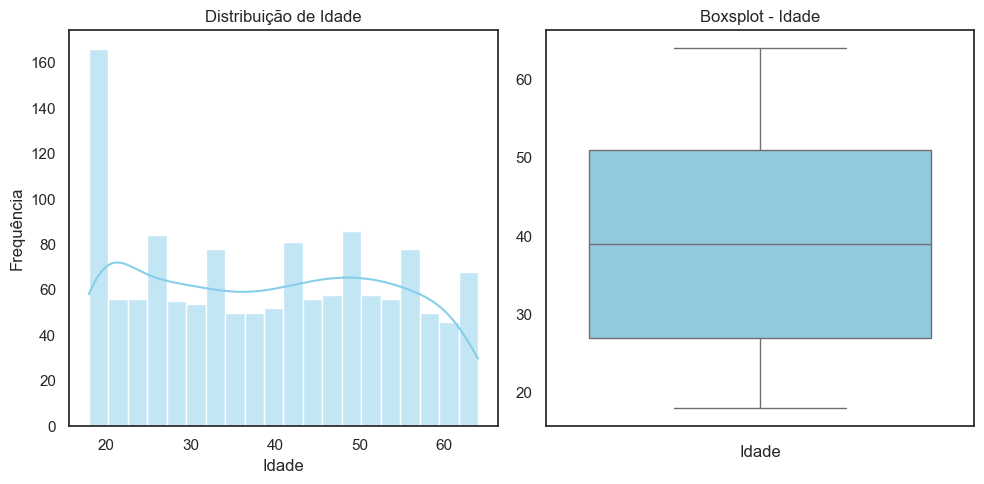

In [44]:
sns.set(style="white", palette="pastel")

# Criando a figura com o 1 linha e 2 colunas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histograma de Idade

sns.histplot(df['Idade'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribuição de Idade')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Frequência')

# Boxsplot de Idade

sns.boxplot(y=df['Idade'], ax=axes[1], color='skyblue')
axes[1].set_title('Boxsplot - Idade')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('')


plt.tight_layout()
plt.show()


Na amostra a distribuição de idade está bem uniforme, com destaque com uma maioria de uma idade menor que 20 anos.

Sem detecção de outliers

### Variável - Custo com saúde (Custo_Saude)

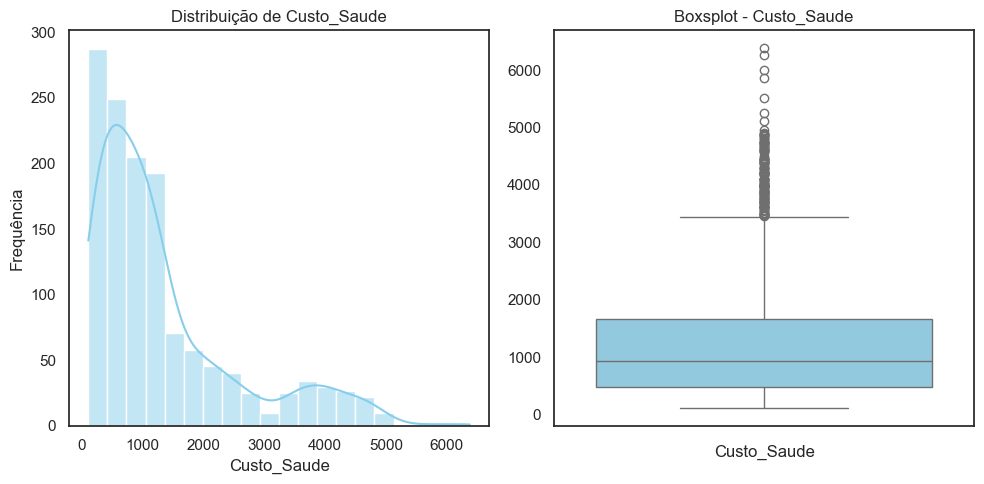

In [43]:
sns.set(style="white", palette="pastel")

# Criando a figura com o 1 linha e 2 colunas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histograma de Custo_Saude

sns.histplot(df['Custo_Saude'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribuição de Custo_Saude')
axes[0].set_xlabel('Custo_Saude')
axes[0].set_ylabel('Frequência')

# Boxsplot de Custo_Saude

sns.boxplot(y=df['Custo_Saude'], ax=axes[1], color='skyblue')
axes[1].set_title('Boxsplot - Custo_Saude')
axes[1].set_xlabel('Custo_Saude')
axes[1].set_ylabel('')


plt.tight_layout()
plt.show()


Concentração dos valores de custo até R$2.000,00

Alguns Outliers a partir de R$3.000,00 

### Variável - Quantidade de Filhos (Qte_Filhos)

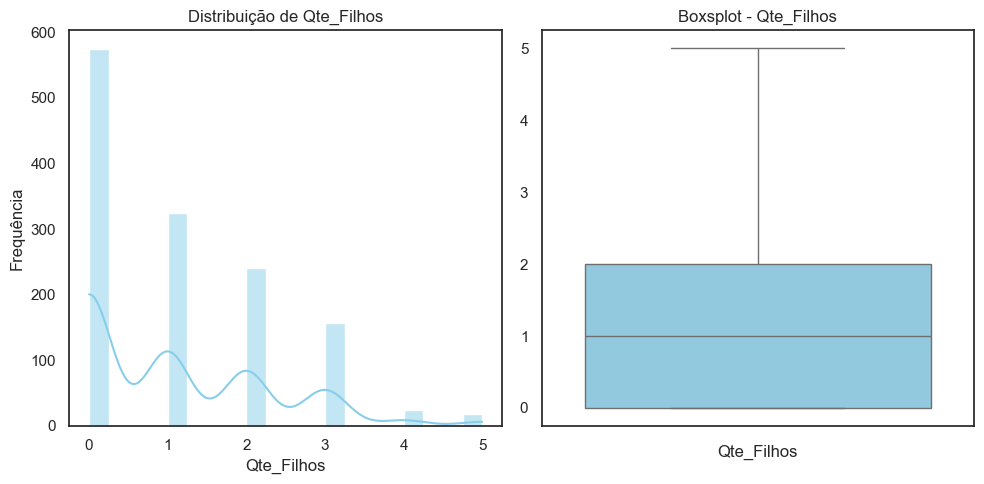

In [86]:
sns.set(style="white", palette="pastel")

# Criando a figura com o 1 linha e 2 colunas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histograma de Qte_Filhos

sns.histplot(df['Qte_Filhos'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribuição de Qte_Filhos')
axes[0].set_xlabel('Qte_Filhos')
axes[0].set_ylabel('Frequência')

# Boxsplot de Qte_Filhos

sns.boxplot(y=df['Qte_Filhos'], ax=axes[1], color='skyblue')
axes[1].set_title('Boxsplot - Qte_Filhos')
axes[1].set_xlabel('Qte_Filhos')
axes[1].set_ylabel('')


plt.tight_layout()
plt.show()


Criando uma função para o calculo da tabela de frequência para as variáveis qualitativas

In [ ]:
def tabela_frequencia(df,coluna, ordem = None):
    """
    Gera uma tabela de frequências absoluta, relativa e acumulada para uma coluna com variável qualitativa de um DataFrame.
    Para uma variável qualitativa, com opção de definir a ordem
    Parâmetros:
    --- ---------
    df: pd.DataFrame
        DataFrame contendo os dados.
    coluna : str
        Nome da coluna(variável qualitativa) para ser analsiada
    ordem : list, opcional
        Ordem personalizada para os valores da variável qualitativa.

    Retorna:
    --- -------
    pd.DataFrame
        Tabela de frequências com colunas para frequência absoluta, relativa (%) e acumulada (%).
    """
    #Frequências
    freq_abs = df[coluna].value_counts()
    freq_relativa = (df[coluna].value_counts(normalize=True) * 100).round(2)

    #Montando a tabela inicial
    tabela_frequencias = pd.DataFrame({
        'Frequência Absoluta': freq_abs,
        'Frequência Relativa (%)': freq_relativa
    })
    if ordem is not None:
        tabela_frequencias = tabela_frequencias.reindex(ordem)
    
    #Recalculando a frequencia acumulada com base na nova ordem
    tabela_frequencias['Frequência Acumulada (%)'] = tabela_frequencias['Frequência Relativa (%)'].cumsum().round(2)

    #Definindo o nome do índice
    tabela_frequencias.index.name = coluna

    return tabela_frequencias

### Variável - Fumante

In [82]:
tabela_frequencia(df, 'Fumante')

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada (%)
Fumante,,,
Não,1064,79.52,79.52
Sim,274,20.48,100.00


80% São fumantes, 20% não

In [83]:
tabela_frequencia(df, 'Região')

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada (%)
Região,,,
Sudeste,364,27.20,27.20
Centro,325,24.29,51.49
Norte,325,24.29,75.78
Nordeste,324,24.22,100.00


Bem equilibrado a distribuição da região.

### Variável - Sexo

In [84]:
tabela_frequencia(df, 'Sexo')

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada (%)
Sexo,,,
Masculino,676,50.52,50.52
Feminino,662,49.48,100.00


Bem equilibrado a distribuição de sexo

### Variável - Faixa de IMC

In [85]:
ordem_faixa_imc = [
    'Abaixo do peso',
    'Peso normal',
    'Sobrepeso',
    'Obesidade grau I',
    'Obesidade grau II',
    'Obesidade grau III',
]
tabela_frequencia(df, 'Faixa_IMC', ordem = ordem_faixa_imc)

,Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada (%)
Faixa_IMC,,,
Abaixo do peso,21,1.57,1.57
Peso normal,221,16.52,18.09
Sobrepeso,380,28.40,46.49
Obesidade grau I,397,29.67,76.16
Obesidade grau II,226,16.89,93.05
Obesidade grau III,93,6.95,100.00
